In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show

In [8]:
raw_1 = pd.read_csv('covid_19_india.csv')

In [9]:
raw_1

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
3958,3959,10/07/20,8:00 AM,Tripura,-,-,1338,1,1776
3959,3960,10/07/20,8:00 AM,Uttarakhand,-,-,2672,46,3305
3960,3961,10/07/20,8:00 AM,Uttar Pradesh,-,-,21127,862,32362
3961,3962,10/07/20,8:00 AM,West Bengal,-,-,16826,854,25911


In [53]:
raw_2 = pd.read_csv('district_level_latest.csv')

In [54]:
raw_2 

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,4356,4356,0,0,0,-633,-633,0,0,NaN,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,NaN,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,NaN,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,NaN,NaN
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,422,154,268,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,760,TG,Telangana,TG_Unknown,Unknown,456,-16566,16728,294,0,0,0,0,0,NaN,NaN
795,761,TR,Tripura,TR_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN
796,762,UP,Uttar Pradesh,UP_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN
797,763,UT,Uttarakhand,UT_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN


In [10]:
raw_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       3963 non-null   int64 
 1   Date                      3963 non-null   object
 2   Time                      3963 non-null   object
 3   State/UnionTerritory      3963 non-null   object
 4   ConfirmedIndianNational   3963 non-null   object
 5   ConfirmedForeignNational  3963 non-null   object
 6   Cured                     3963 non-null   int64 
 7   Deaths                    3963 non-null   int64 
 8   Confirmed                 3963 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 278.8+ KB


In [55]:
raw_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SlNo             799 non-null    int64  
 1   State_Code       799 non-null    object 
 2   State            799 non-null    object 
 3   District_Key     799 non-null    object 
 4   District         799 non-null    object 
 5   Confirmed        799 non-null    int64  
 6   Active           799 non-null    int64  
 7   Recovered        799 non-null    int64  
 8   Deceased         799 non-null    int64  
 9   Migrated_Other   799 non-null    int64  
 10  Delta_Confirmed  799 non-null    int64  
 11  Delta_Active     799 non-null    int64  
 12  Delta_Recovered  799 non-null    int64  
 13  Delta_Deceased   799 non-null    int64  
 14  District_Notes   5 non-null      object 
 15  Last_Updated     0 non-null      float64
dtypes: float64(1), int64(10), object(5)
memory usage: 100.0+ KB


In [11]:
raw_1.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [12]:
raw_1.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
3958,3959,10/07/20,8:00 AM,Tripura,-,-,1338,1,1776
3959,3960,10/07/20,8:00 AM,Uttarakhand,-,-,2672,46,3305
3960,3961,10/07/20,8:00 AM,Uttar Pradesh,-,-,21127,862,32362
3961,3962,10/07/20,8:00 AM,West Bengal,-,-,16826,854,25911
3962,3963,10/07/20,8:00 AM,Cases being reassigned to states,-,-,0,0,4161


In [13]:
raw_1.describe()

,Sno,Cured,Deaths,Confirmed
count,3963.000000,3963.000000,3963.000000,3963.000000
mean,1982.000000,2791.492556,155.840020,5245.161746
std,1144.163887,9779.420988,685.676637,17698.383165
min,1.000000,0.000000,0.000000,0.000000
25%,991.500000,3.000000,0.000000,28.000000
50%,1982.000000,60.000000,3.000000,301.000000
75%,2972.500000,1224.500000,34.000000,2824.000000
max,3963.000000,127259.000000,9667.000000,230599.000000


In [14]:
filter = raw_1["State/UnionTerritory"] == "Meghalaya"
df = raw_1[filter]
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
946,947,14/04/20,5:00 PM,Meghalaya,-,-,0,0,1
979,980,15/04/20,5:00 PM,Meghalaya,-,-,0,1,7
1012,1013,16/04/20,5:00 PM,Meghalaya,-,-,0,1,7
1045,1046,17/04/20,5:00 PM,Meghalaya,-,-,0,1,9
1078,1079,18/04/20,5:00 PM,Meghalaya,-,-,0,1,11
...,...,...,...,...,...,...,...,...,...
3804,3805,06/07/20,8:00 AM,Meghalaya,-,-,43,1,62
3840,3841,07/07/20,8:00 AM,Meghalaya,-,-,43,1,80
3876,3877,08/07/20,8:00 AM,Meghalaya,-,-,43,1,80
3912,3913,09/07/20,8:00 AM,Meghalaya,-,-,43,1,80


In [56]:
filter = raw_2["State"] == "Meghalaya"
df1 = raw_2[filter]
df1

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
367,421,ML,Meghalaya,ML_East Garo Hills,East Garo Hills,0,0,0,0,0,0,0,0,0,NaN,NaN
368,422,ML,Meghalaya,ML_East Jaintia Hills,East Jaintia Hills,1,1,0,0,0,0,0,0,0,NaN,NaN
369,423,ML,Meghalaya,ML_East Khasi Hills,East Khasi Hills,59,41,17,1,0,0,0,0,0,NaN,NaN
370,424,ML,Meghalaya,ML_North Garo Hills,North Garo Hills,1,0,1,0,0,0,0,0,0,NaN,NaN
371,425,ML,Meghalaya,ML_Ribhoi,Ribhoi,16,16,0,0,0,0,0,0,0,NaN,NaN
372,426,ML,Meghalaya,ML_South Garo Hills,South Garo Hills,0,0,0,0,0,0,0,0,0,NaN,NaN
373,427,ML,Meghalaya,ML_South West Garo Hills,South West Garo Hills,7,1,6,0,0,0,0,0,0,NaN,NaN
374,428,ML,Meghalaya,ML_South West Khasi Hills,South West Khasi Hills,0,0,0,0,0,0,0,0,0,NaN,NaN
375,429,ML,Meghalaya,ML_West Garo Hills,West Garo Hills,8,4,4,0,0,0,0,0,0,NaN,NaN
376,430,ML,Meghalaya,ML_West Jaintia Hills,West Jaintia Hills,5,0,5,0,0,0,0,0,0,NaN,NaN


In [15]:
df = df.drop(columns = [ "Sno" , "District_Key" , "ConfirmedIndianNational" , "ConfirmedForeignNational"])
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
946,14/04/20,Meghalaya,0,0,1
979,15/04/20,Meghalaya,0,1,7
1012,16/04/20,Meghalaya,0,1,7
1045,17/04/20,Meghalaya,0,1,9
1078,18/04/20,Meghalaya,0,1,11
...,...,...,...,...,...
3804,06/07/20,Meghalaya,43,1,62
3840,07/07/20,Meghalaya,43,1,80
3876,08/07/20,Meghalaya,43,1,80
3912,09/07/20,Meghalaya,43,1,80


In [16]:
# Now , We'll rename State/UnionTerritory as it is very long.
df = df = df.rename(columns={"State/UnionTerritory": "State"})
df

,Date,State,Cured,Deaths,Confirmed
946,14/04/20,Meghalaya,0,0,1
979,15/04/20,Meghalaya,0,1,7
1012,16/04/20,Meghalaya,0,1,7
1045,17/04/20,Meghalaya,0,1,9
1078,18/04/20,Meghalaya,0,1,11
...,...,...,...,...,...
3804,06/07/20,Meghalaya,43,1,62
3840,07/07/20,Meghalaya,43,1,80
3876,08/07/20,Meghalaya,43,1,80
3912,09/07/20,Meghalaya,43,1,80


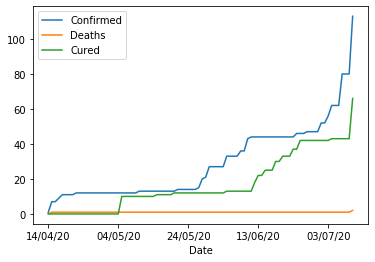

In [17]:
df.plot(x = "Date" , y = ["Confirmed" , "Deaths" , "Cured"])

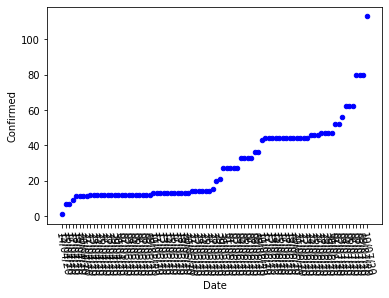

In [18]:
# We'll use scatter plot.
ax1 = df.plot.scatter(x='Date',y= "Confirmed",c='blue' , rot = 10000000 )

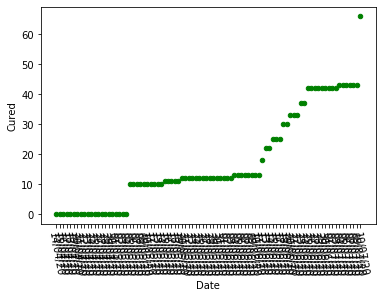

In [19]:
ax2 = df.plot.scatter(x='Date',y= "Cured",c='green' , rot = 10000000)

In [20]:
#date formating of observation date column
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df

,Date,State,Cured,Deaths,Confirmed
946,2020-04-14,Meghalaya,0,0,1
979,2020-04-15,Meghalaya,0,1,7
1012,2020-04-16,Meghalaya,0,1,7
1045,2020-04-17,Meghalaya,0,1,9
1078,2020-04-18,Meghalaya,0,1,11
...,...,...,...,...,...
3804,2020-06-07,Meghalaya,43,1,62
3840,2020-07-07,Meghalaya,43,1,80
3876,2020-08-07,Meghalaya,43,1,80
3912,2020-09-07,Meghalaya,43,1,80


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 946 to 3948
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       88 non-null     datetime64[ns]
 1   State      88 non-null     object        
 2   Cured      88 non-null     int64         
 3   Deaths     88 non-null     int64         
 4   Confirmed  88 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.1+ KB


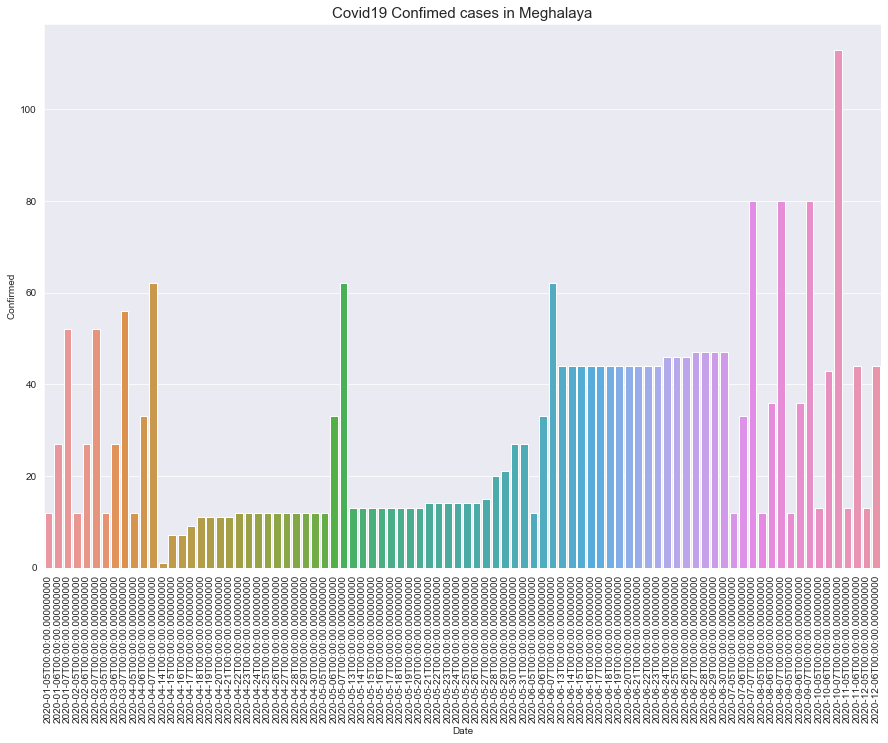

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x = df.Date , y = df['Confirmed'])
plt.title("Covid19 Confimed cases in Meghalaya", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

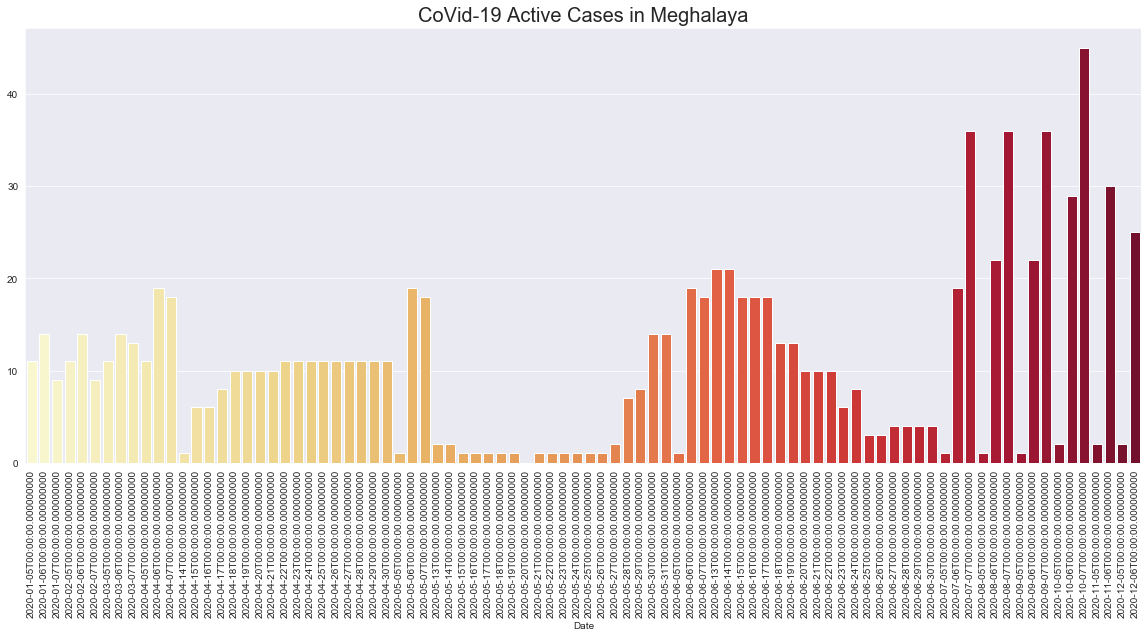

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,8))
atv_cases=df['Confirmed']-df['Cured']-df['Deaths']
sns.barplot(x=df.Date, y = atv_cases, palette='YlOrRd')
plt.title("CoVid-19 Active Cases in Meghalaya", fontsize=20)
plt.xticks(rotation = 90)
plt.show()

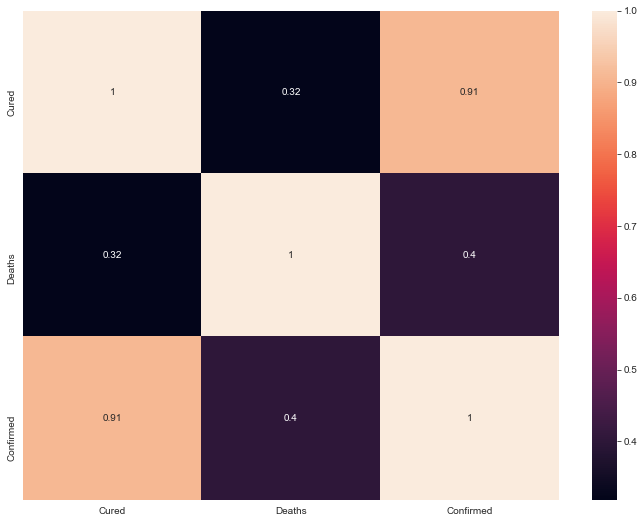

In [25]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True)

Text(0, 0.5, 'Confirmed')

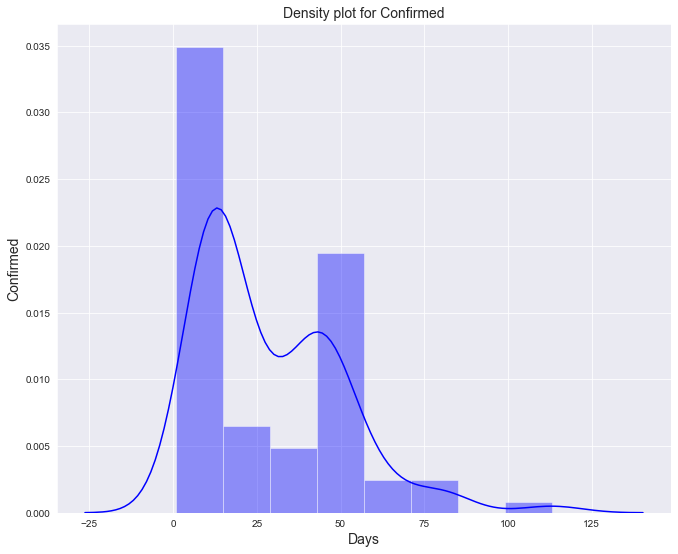

In [26]:
plt.figure(figsize=(11,9))
sns.set_style('darkgrid')
sns.distplot(df['Confirmed'], color = 'blue')
plt.title('Density plot for Confirmed', fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Confirmed', fontsize=14)

In [27]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Cured']])
train_y = np.asanyarray(train[['Confirmed']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.12798534]]
Intercept:  [8.18611789]


Text(0, 0.5, 'Confirmed')

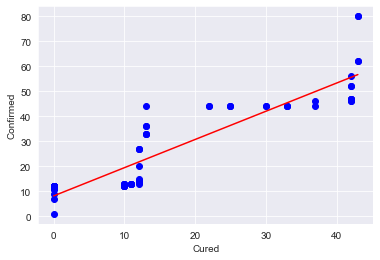

In [30]:
plt.scatter(train.Cured, train.Confirmed,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Cured")
plt.ylabel("Confirmed")

In [31]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Cured']])
test_y = np.asanyarray(test[['Confirmed']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 9.20
Residual sum of squares (MSE): 159.62
R2-score: 0.65


In [32]:
raw_2 = pd.read_csv('PAML_COVID_Dataset .csv')

In [33]:
raw_2

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,Male,0,61,chest pain or pressure,diarrhoea,fever,Seviour,flu
1,31/01/20,6:00 PM,Kerala,1,Female,0,39,chest pain or pressure,diarrhoea,dry cough,Mild,Covid
2,1/2/2020,6:00 PM,Kerala,2,Female,0,55,loss of speech or movement,sore throat,fever,Mild,Covid
3,2/2/2020,6:00 PM,Kerala,3,Male,0,74,chest pain or pressure,headache,fever,Mild,Covid
4,3/2/2020,6:00 PM,Kerala,3,Female,0,70,chest pain or pressure,sore throat,tiredness,Moderate,flu
...,...,...,...,...,...,...,...,...,...,...,...,...
3130,17/06/20,8:00 AM,Tripura,-,Female,-,18,loss of speech or movement,conjunctivitis,fever,Mild,Covid
3131,17/06/20,8:00 AM,Uttarakhand,-,Male,-,99,loss of speech or movement,"a rash on skin, or discolouration of fingers o...",fever,Moderate,flu
3132,17/06/20,8:00 AM,Uttar Pradesh,-,Female,-,17,chest pain or pressure,aches and pains,dry cough,Moderate,Covid
3133,17/06/20,8:00 AM,West Bengal,-,Male,-,65,difficulty breathing or shortness of breath,conjunctivitis,tiredness,Mild,flu


In [34]:
filt = raw_2["State/UnionTerritory"] == "Meghalaya"
df1 = raw_2[filt]
df1

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
946,14/04/20,5:00 PM,Meghalaya,-,Male,-,10,difficulty breathing or shortness of breath,sore throat,tiredness,Mild,Covid
979,15/04/20,5:00 PM,Meghalaya,-,Male,-,11,chest pain or pressure,aches and pains,fever,Mild,Covid
1012,16/04/20,5:00 PM,Meghalaya,-,Female,-,93,loss of speech or movement,conjunctivitis,tiredness,Seviour,flu
1045,17/04/20,5:00 PM,Meghalaya,-,Female,-,64,chest pain or pressure,conjunctivitis,tiredness,Seviour,flu
1078,18/04/20,5:00 PM,Meghalaya,-,Male,-,67,chest pain or pressure,loss of taste or smell,tiredness,Mild,Covid
...,...,...,...,...,...,...,...,...,...,...,...,...
2976,13/06/20,8:00 AM,Meghalaya,-,Male,-,31,difficulty breathing or shortness of breath,sore throat,dry cough,Moderate,flu
3012,14/06/20,8:00 AM,Meghalaya,-,Male,-,83,loss of speech or movement,sore throat,tiredness,Moderate,Covid
3048,15/06/20,8:00 AM,Meghalaya,-,Female,-,88,difficulty breathing or shortness of breath,diarrhoea,fever,Moderate,flu
3084,16/06/20,8:00 AM,Meghalaya,-,Male,-,73,chest pain or pressure,diarrhoea,dry cough,Seviour,flu


In [44]:
df2 = df1.drop(columns = [ "Time" , "ConfirmedIndianNational" , "ConfirmedForeignNational"])
df2

,Date,State/UnionTerritory,Gender,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
946,14/04/20,Meghalaya,Male,10,difficulty breathing or shortness of breath,sore throat,tiredness,Mild,Covid
979,15/04/20,Meghalaya,Male,11,chest pain or pressure,aches and pains,fever,Mild,Covid
1012,16/04/20,Meghalaya,Female,93,loss of speech or movement,conjunctivitis,tiredness,Seviour,flu
1045,17/04/20,Meghalaya,Female,64,chest pain or pressure,conjunctivitis,tiredness,Seviour,flu
1078,18/04/20,Meghalaya,Male,67,chest pain or pressure,loss of taste or smell,tiredness,Mild,Covid
...,...,...,...,...,...,...,...,...,...
2976,13/06/20,Meghalaya,Male,31,difficulty breathing or shortness of breath,sore throat,dry cough,Moderate,flu
3012,14/06/20,Meghalaya,Male,83,loss of speech or movement,sore throat,tiredness,Moderate,Covid
3048,15/06/20,Meghalaya,Female,88,difficulty breathing or shortness of breath,diarrhoea,fever,Moderate,flu
3084,16/06/20,Meghalaya,Male,73,chest pain or pressure,diarrhoea,dry cough,Seviour,flu


In [46]:
filt = df2["Most common symptoms"] == "tiredness"
df2 = df2[filt]
df2

,Date,State/UnionTerritory,Gender,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
946,14/04/20,Meghalaya,Male,10,difficulty breathing or shortness of breath,sore throat,tiredness,Mild,Covid
1012,16/04/20,Meghalaya,Female,93,loss of speech or movement,conjunctivitis,tiredness,Seviour,flu
1045,17/04/20,Meghalaya,Female,64,chest pain or pressure,conjunctivitis,tiredness,Seviour,flu
1078,18/04/20,Meghalaya,Male,67,chest pain or pressure,loss of taste or smell,tiredness,Mild,Covid
1144,20/04/20,Meghalaya,Male,95,loss of speech or movement,conjunctivitis,tiredness,Mild,flu
1210,22/04/20,Meghalaya,Female,38,difficulty breathing or shortness of breath,diarrhoea,tiredness,Moderate,flu
1242,23/04/20,Meghalaya,Female,67,loss of speech or movement,loss of taste or smell,tiredness,Mild,Covid
1338,26/04/20,Meghalaya,Female,52,difficulty breathing or shortness of breath,headache,tiredness,Mild,Covid
1498,1/5/2020,Meghalaya,Male,68,loss of speech or movement,aches and pains,tiredness,Mild,Covid
1791,10/5/2020,Meghalaya,Female,74,loss of speech or movement,aches and pains,tiredness,Seviour,flu


In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 946 to 3012
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  21 non-null     object
 1   State/UnionTerritory  21 non-null     object
 2   Gender                21 non-null     object
 3   Age                   21 non-null     int64 
 4   Serious symptoms      21 non-null     object
 5   Less common symptoms  21 non-null     object
 6   Most common symptoms  21 non-null     object
 7   Severity              21 non-null     object
 8   Patient_Status        21 non-null     object
dtypes: int64(1), object(8)
memory usage: 1.6+ KB


In [40]:
df = df.drop(columns = [ "Date"])
df

,State,Cured,Deaths,Confirmed
946,Meghalaya,0,0,1
979,Meghalaya,0,1,7
1012,Meghalaya,0,1,7
1045,Meghalaya,0,1,9
1078,Meghalaya,0,1,11
...,...,...,...,...
3804,Meghalaya,43,1,62
3840,Meghalaya,43,1,80
3876,Meghalaya,43,1,80
3912,Meghalaya,43,1,80


In [41]:
df3 = pd.concat([df,df2],axis=1)
df3.head()

,State,Cured,Deaths,Confirmed,Date,State/UnionTerritory,Gender,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
946,Meghalaya,0,0,1,14/04/20,Meghalaya,Male,10.0,difficulty breathing or shortness of breath,sore throat,tiredness,Mild,Covid
979,Meghalaya,0,1,7,15/04/20,Meghalaya,Male,11.0,chest pain or pressure,aches and pains,fever,Mild,Covid
1012,Meghalaya,0,1,7,16/04/20,Meghalaya,Female,93.0,loss of speech or movement,conjunctivitis,tiredness,Seviour,flu
1045,Meghalaya,0,1,9,17/04/20,Meghalaya,Female,64.0,chest pain or pressure,conjunctivitis,tiredness,Seviour,flu
1078,Meghalaya,0,1,11,18/04/20,Meghalaya,Male,67.0,chest pain or pressure,loss of taste or smell,tiredness,Mild,Covid


In [42]:
df3.drop(['State','Date'],axis=1,inplace=True)
df3.head()

,Cured,Deaths,Confirmed,State/UnionTerritory,Gender,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
946,0,0,1,Meghalaya,Male,10.0,difficulty breathing or shortness of breath,sore throat,tiredness,Mild,Covid
979,0,1,7,Meghalaya,Male,11.0,chest pain or pressure,aches and pains,fever,Mild,Covid
1012,0,1,7,Meghalaya,Female,93.0,loss of speech or movement,conjunctivitis,tiredness,Seviour,flu
1045,0,1,9,Meghalaya,Female,64.0,chest pain or pressure,conjunctivitis,tiredness,Seviour,flu
1078,0,1,11,Meghalaya,Male,67.0,chest pain or pressure,loss of taste or smell,tiredness,Mild,Covid
